### Exercise 2.5 (programming)

* Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems.   
* Use a modified version of the 10-armed testbed in which all the `q∗(a)` start out equal and then take independent random walks.  
(say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the `q∗(a)` on each step).    
* Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, `α = 0.1`.    
* Use `ε = 0.1` and longer runs, say of 10,000 steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
k = 10

In [3]:
Q1 = np.zeros(k)
Q2 = np.zeros(k)
N1 = np.zeros(k)
N2 = np.zeros(k)

R1_sum = 0
R2_sum = 0

R1_avg = []
R2_avg = []

count_optimal_A1 = 0
count_optimal_A2 = 0

optimal_A1_rate = []
optimal_A2_rate = []

alpha = 0.1
q = np.zeros(k)
epsilon = 0.1
for i in range(10000):
    q = q + np.random.normal(0, 0.01, k)
    A = np.random.randint(len(q))
    A1 = np.random.choice(np.array([np.argmax(Q1), A]), p=[1-epsilon, epsilon])
    A2 = np.random.choice(np.array([np.argmax(Q2), A]), p=[1-epsilon, epsilon])
    
    R1 = q[A1]
    N1[A1] += 1
    Q1[A1] += (R1 - Q1[A1]) / N1[A1]
    R1_sum += R1
    R1_avg.append(R1_sum / (i+1))
    if A1 == np.argmax(q):
        count_optimal_A1 += 1
    optimal_A1_rate.append(count_optimal_A1 / (i+1))
    
    R2 = q[A2]
    N2[A2] += 1
    Q2[A2] += (R2 - Q2[A2]) * alpha
    R2_sum += R2
    R2_avg.append(R2_sum / (i+1))
    if A2 == np.argmax(q):
        count_optimal_A2 += 1
    optimal_A2_rate.append(count_optimal_A2 / (i+1))

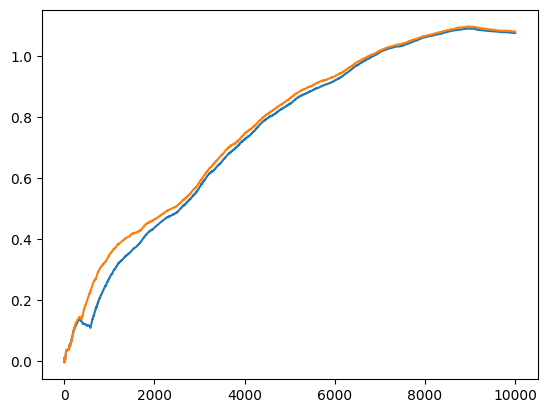

In [4]:
plt.plot(R1_avg, label='sample-average')
plt.plot(R2_avg, label='constant step-size')

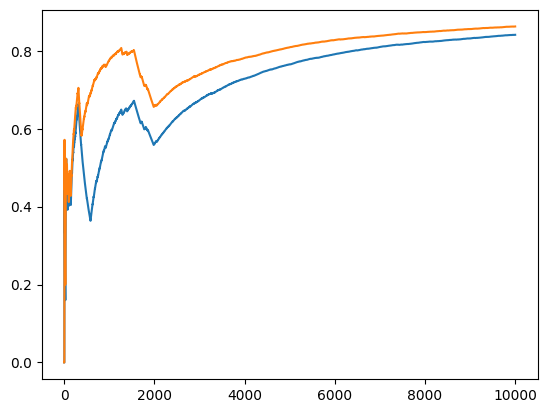

In [5]:
plt.plot(optimal_A1_rate, label='sample-average')
plt.plot(optimal_A2_rate, label='constant step-size')